In [1]:
import pandas as pd

In [14]:
dados =  "https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv"

df = pd.read_csv(dados, sep = ",")

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Pré-processamento dos dados

Escolha dos atributos não necessários para a clusterização.

CUST_ID é a identificação do cliente, que não será útil para o modelo.\
TENURE é o tempo de renovação do contrato, esse atributo inicialmente não será necessário para nosso modelo. 

In [15]:
df.drop(columns = ['CUST_ID','TENURE'], inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [18]:
missing = df.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

_Uso da mediana para preencher os NaN em MINIMUM_PAYMENTS, essa medida de tendência central foi escolhida, pois minimiza a influência dos outliers_

In [20]:
df.fillna(df.median(), inplace = True)

In [21]:
missing = df.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

_Agora, iniciaremos a normalização de atributos com aplitudes elevadas, além disso, normalizar colabora para que o algorítmo não considere pesos de forma incorreta aos dados._


In [30]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values)

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =5, n_init = 10, max_iter=300)
y_pred = kmeans.fit_predict(values)
y_pred

array([3, 2, 3, ..., 3, 3, 0], dtype=int32)

Vamos utilizar os critérios de validações com métricas internas, considerando a ausência dos labels.\
Existem as métricas baseadas em: 

* compactação verifica o quanto compactos os objetos estão intragrupo. 
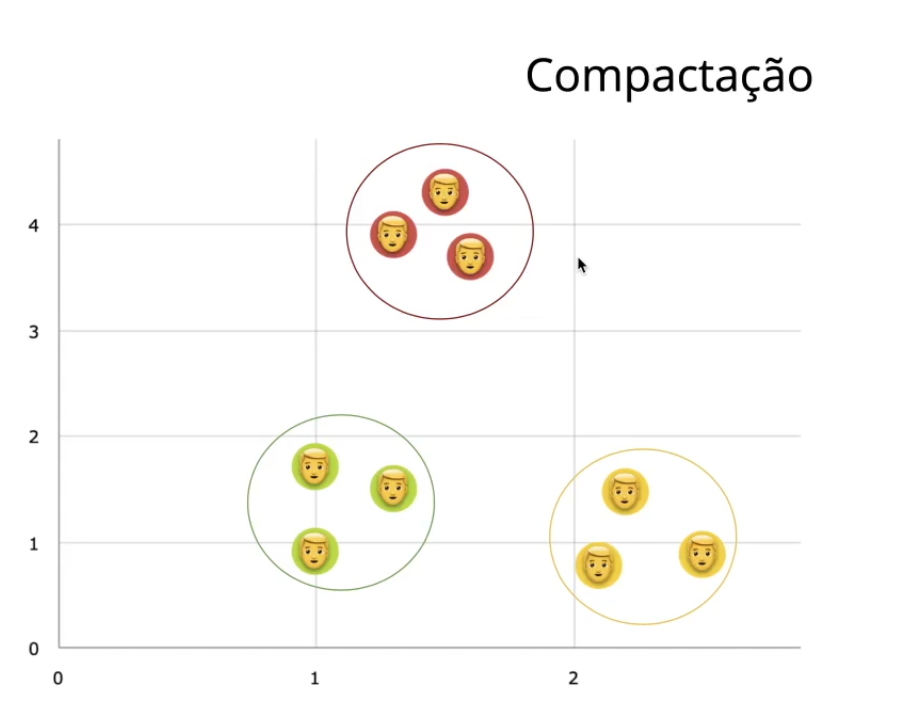

Coeficinte de Silhoutte, variação entre -1 e 1 e
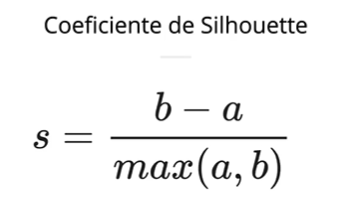 , em que \
a = distância média entre o ponto e todos os outros ponto do mesmo cluster.\
b = é a distância média entre o ponto e todos os outros pontos do cluster mais próximo

* separação analise a distância intergrupos. \
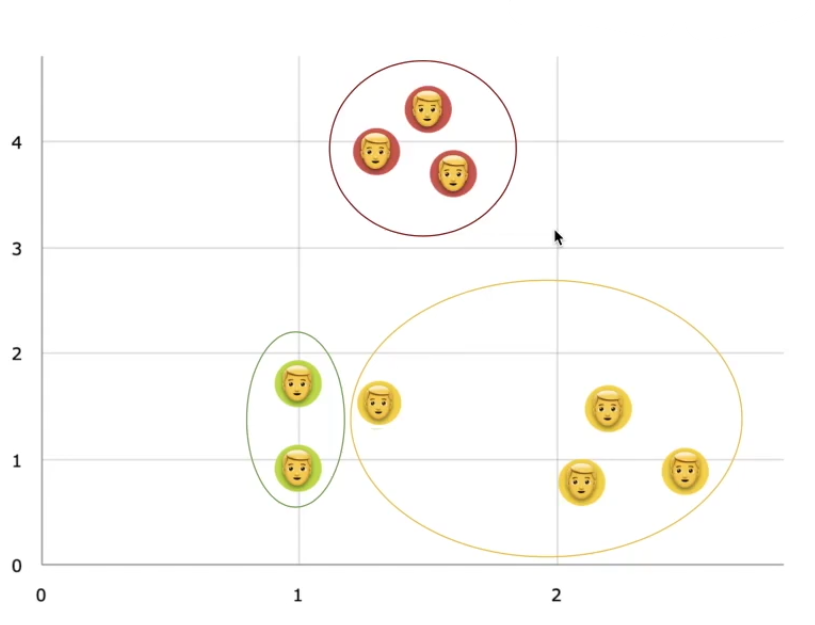
$$DB = \frac{1}{n_{clusters}}\sum_{i=1}^{n_{clusters}}\max_{j\neq i}\left(\frac{\sigma_i + \sigma_j}{d(c_i,c_j)}\right)$$

* $n_{clusters}$ é o número de clusters.
* $\sigma_i$ é a dispersão do cluster i.
* $c_i$ é o centróide do cluster i.
* $d(c_i,c_j)$ é a distância entre os centróides dos clusters i e j.
* $\max_{j\neq i}(d(c_i,c_j)\frac{\sigma_i + \sigma_j}{d(c_i,c_j)})$ é a similaridade entre os clusters i e j.


INDICE CALINSKI (Melhorar isso)

In [48]:
from sklearn import metrics
labels = kmeans.labels_
silhoutte = metrics.silhouette_score(values, labels, metric='euclidean')
silhoutte

0.36457606314711744

In [47]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.0749530537541763

In [50]:
calinski  = metrics.calinski_harabasz_score(values, labels)
calinski

3431.5800207486095